<a href="https://colab.research.google.com/github/0alfajar/MachineLearningProject/blob/main/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Impendencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [3]:
# load data
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [4]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [7]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
# number row and column
gold_data.shape

(2290, 6)

In [6]:
# getting info
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
# cheking missing value
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
# getting statistical measure
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [12]:
gold_data.drop(columns='Date', inplace=True)

In [13]:
correlation = gold_data.corr()

<Axes: >

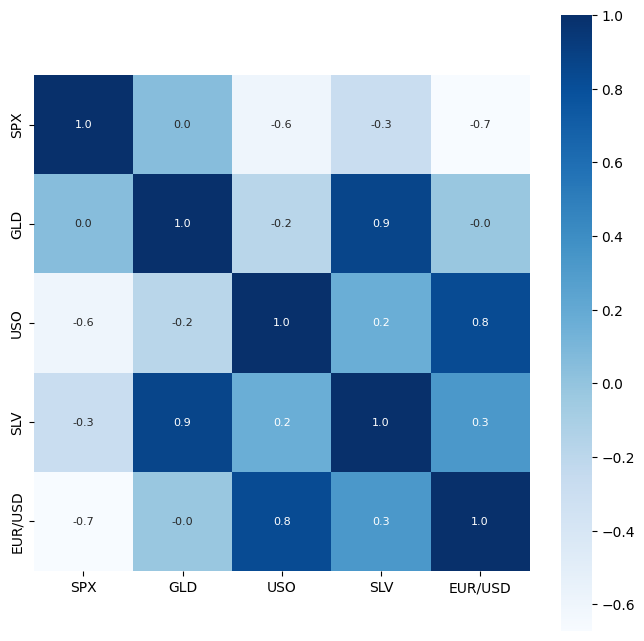

In [14]:
# constructiong heatmap
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [15]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-16-b27b488355f5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'], color='green')


<Axes: xlabel='GLD', ylabel='Density'>

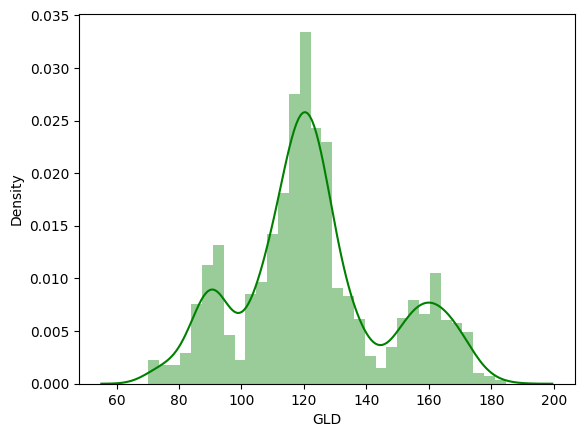

In [16]:
# check the distribution the GLD Price
sns.distplot(gold_data['GLD'], color='green')

Splitting the Features and Label

In [17]:
X = gold_data.drop(['GLD'], axis=1)
y = gold_data['GLD']

In [18]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [19]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [21]:
print(X.shape, X_train.shape, X_test.shape)

(2290, 4) (1832, 4) (458, 4)


Data Modelling

In [22]:
model = RandomForestRegressor(n_estimators=100)

In [23]:
model.fit(X_train, y_train)

RandomForestRegressor()

Model Evaluation

In [25]:
test_data_pred = model.predict(X_test)
print(test_data_pred)

[168.54289965  81.99469991 115.83569985 127.57630026 120.75480112
 154.82779764 149.85229887 126.15420046 117.38539883 125.87780112
 116.58030081 171.92400022 141.56189838 167.69929895 115.16490019
 117.56620061 138.40820297 170.50600152 159.29140355 162.89309973
 155.20930034 124.89590027 176.85919945 157.07440353 125.24720058
  93.88929942  77.85609987 120.49629996 119.06699898 167.54909954
  88.14470063 125.25850027  91.11960059 117.66859999 121.11439965
 135.6943006  115.46180087 115.05500101 148.04729998 107.31290073
 104.12040223  87.14789794 126.47660009 118.0475999  154.00009891
 119.71519995 108.40699958 107.86179829  93.20430098 126.97009813
  74.54410063 113.66099923 121.34119986 111.19779931 118.85719878
 120.78919959 158.9913004  166.60080107 146.95779677  86.04889886
  94.6000005   86.83649879  90.67840002 118.80940096 126.40690059
 127.65709997 169.37830043 122.24759941 117.30519875  98.6354004
 167.83090123 142.49829827 132.30480254 121.26870233 121.24379948
 119.682400

In [27]:
# R Squared Error
error_score = metrics.r2_score(y_test, test_data_pred)
print("R squared error : ", error_score)

R squared error :  0.989703871405742


Compare the Actual Values and Predicted Values in Plot

In [28]:
y_test = list(y_test)

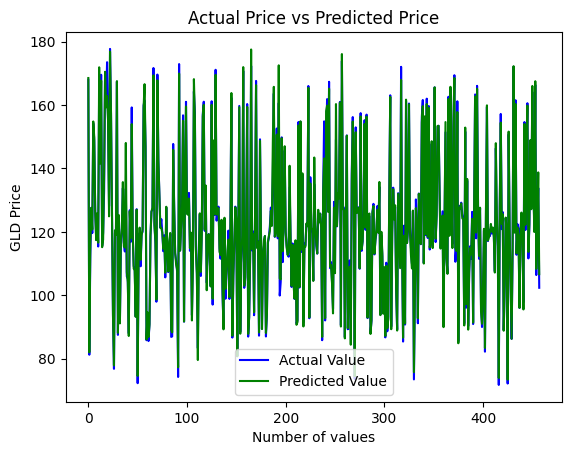

In [32]:
plt.plot(y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_pred, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()